In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/fake-news-detection")
# construct the paths assuming files are in the downloaded path
fake_path = os.path.join(path, "fake.csv")
true_path = os.path.join(path, "true.csv")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fake-news-detection


In [ ]:
ls -lh /root/.cache/kagglehub/datasets/bhavikjikadara/fake-news-detection/versions/1/

total 111M
-rw-r--r-- 1 root root 60M Apr 15 12:10 fake.csv
-rw-r--r-- 1 root root 52M Apr 15 12:10 true.csv


In [ ]:
import pandas as pd

# Load the datasets
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

# Add labels: 0 for fake, 1 for true
fake_df["label"] = 0
true_df["label"] = 1

# Combine the datasets
data = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,title,text,subject,date,label
0,"U.S. Senate votes near unanimously for Russia,...",WASHINGTON (Reuters) - The U.S. Senate voted n...,politicsNews,"June 15, 2017",1
1,Joe Scarborough: It’s Not Our Imagination – T...,People have long speculated about Donald Trump...,News,"November 30, 2017",0
2,"WATCH: CNN Majorly F*cks Up, Has White Suprem...",Donald Trump is the first authoritarian presid...,News,"September 4, 2017",0
3,DEMOCRAT LEGAL EXPERT Shocks The Left With His...,Legal expert and Constitutional law professor ...,politics,"Aug 25, 2017",0
4,"Czech election websites hacked, vote unaffecte...",PRAGUE (Reuters) - The websites used for prese...,worldnews,"October 22, 2017",1


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\[.*?\]', '', text)  # remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>+', '', text)  # remove HTML tags
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # remove punctuation
    text = re.sub(r'\n', '', text)  # remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # remove words with numbers
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

# Apply cleaning to text column (use either title or content or combine both)
data['text'] = data['title'] + " " + data['text']
data['text'] = data['text'].apply(clean_text)

data[['text', 'label']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,us senat vote near unanim russia iran sanction...,1
1,joe scarborough it’ imagin – trump realli lose...,0
2,watch cnn majorli fck white supremacist weigh ...,0
3,democrat legal expert shock left take statu le...,0
4,czech elect websit hack vote unaffect statist ...,1


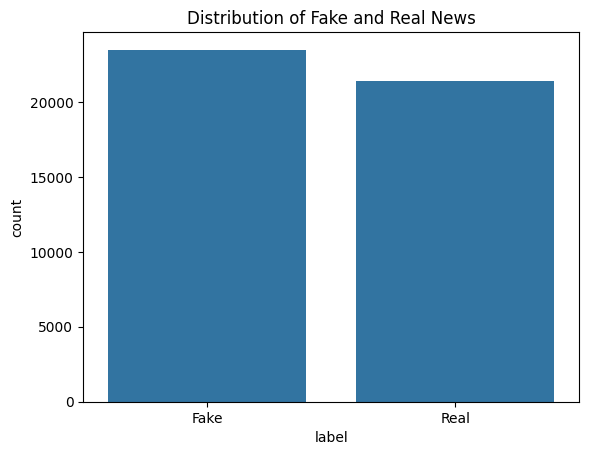

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'combined_df' with 'data'
sns.countplot(data=data, x='label')  # Use the 'data' DataFrame defined earlier
plt.xticks([0, 1], ['Fake', 'Real'])
plt.title("Distribution of Fake and Real News")
plt.show()

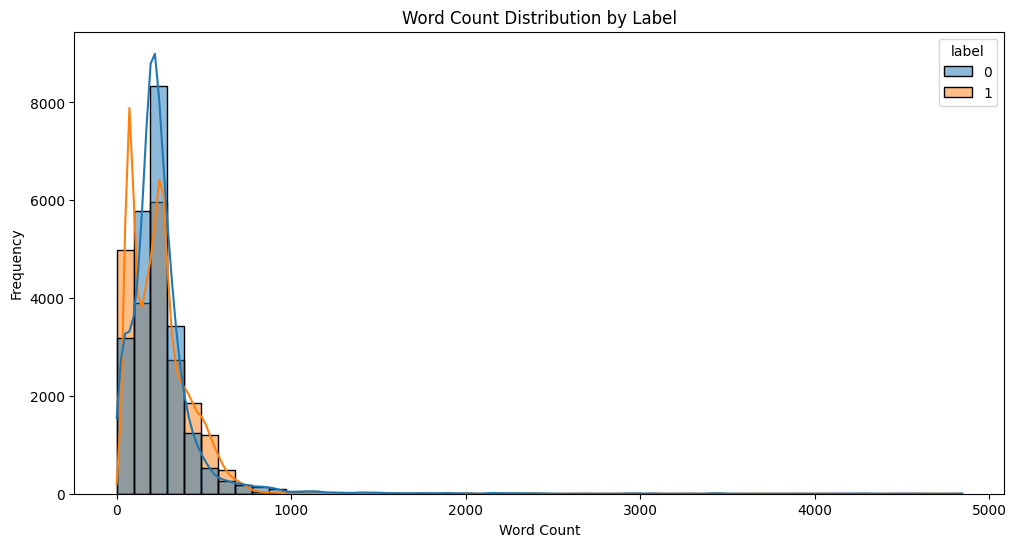

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define combined_df or replace it with the correct DataFrame
combined_df = data.copy() # Assuming 'data' is the DataFrame from previous cells

combined_df['text'] = combined_df['title'] + " " + combined_df['text']
combined_df['text_len'] = combined_df['text'].apply(len)
combined_df['word_count'] = combined_df['text'].apply(lambda x: len(x.split()))

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='word_count', hue='label', bins=50, kde=True)
plt.title("Word Count Distribution by Label")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from collections import Counter
import nltk
nltk.download('punkt')

# Function to get common words
def get_common_words(texts, n=20):
    all_words = " ".join(texts).lower().split()
    return Counter(all_words).most_common(n)

# Fake and Real
fake_words = get_common_words(combined_df[combined_df['label'] == 0]['text'])
real_words = get_common_words(combined_df[combined_df['label'] == 1]['text'])

# Show them
print("Common Fake News Words:\n", fake_words)
print("\nCommon Real News Words:\n", real_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Common Fake News Words:
 [('trump', 87289), ('said', 31387), ('presid', 28944), ('peopl', 26425), ('one', 24777), ('state', 24555), ('would', 23897), ('us', 23493), ('like', 22165), ('say', 21566), ('obama', 21384), ('clinton', 20408), ('donald', 18724), ('time', 18616), ('republican', 17244), ('go', 17114), ('american', 16980), ('get', 16337), ('make', 16044), ('new', 15867)]

Common Real News Words:
 [('said', 99046), ('trump', 51974), ('us', 44892), ('state', 36239), ('would', 31878), ('reuter', 28365), ('presid', 27727), ('republican', 23361), ('govern', 20149), ('say', 19344), ('hous', 18735), ('new', 18448), ('year', 18288), ('democrat', 16700), ('unit', 16608), ('senat', 16501), ('also', 15957), ('elect', 15899), ('offici', 15375), ('peopl', 14771)]


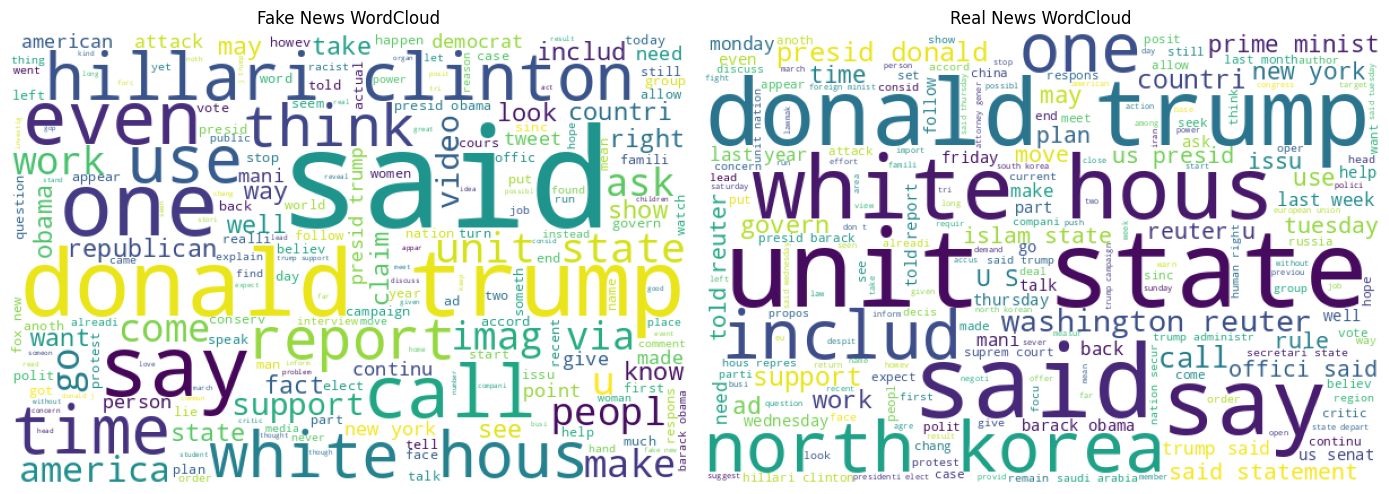

In [ ]:
from wordcloud import WordCloud

# Generate wordclouds
fake_text = " ".join(combined_df[combined_df['label'] == 0]['text'])
real_text = " ".join(combined_df[combined_df['label'] == 1]['text'])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(fake_text))
plt.title("Fake News WordCloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(real_text))
plt.title("Real News WordCloud")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Get bigrams
def get_top_ngrams(texts, n=2, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

print("Top Bigrams in Fake News:")
print(get_top_ngrams(combined_df[combined_df['label'] == 0]['text']))

print("\nTop Bigrams in Real News:")
print(get_top_ngrams(combined_df[combined_df['label'] == 1]['text']))


Top Bigrams in Fake News:
[('donald trump', np.int64(16810)), ('hillari clinton', np.int64(7123)), ('white hous', np.int64(6598)), ('unit state', np.int64(6209)), ('new york', np.int64(4374)), ('presid trump', np.int64(4175)), ('presid obama', np.int64(3994)), ('fox news', np.int64(3808)), ('trump support', np.int64(2410)), ('barack obama', np.int64(2403))]

Top Bigrams in Real News:
[('unit state', np.int64(11777)), ('donald trump', np.int64(10274)), ('white hous', np.int64(8999)), ('north korea', np.int64(7072)), ('washington reuter', np.int64(6488)), ('presid donald', np.int64(5939)), ('new york', np.int64(4686)), ('prime minist', np.int64(4201)), ('said statement', np.int64(3948)), ('islam state', np.int64(3628))]


In [ ]:
# Check shapes
print("Fake news shape:", fake_df.shape)
print("True news shape:", true_df.shape)

# Preview data
print("Fake columns:", fake_df.columns)
print("True columns:", true_df.columns)

# Check for nulls
print("Null values in fake news:\n", fake_df.isnull().sum())
print("Null values in true news:\n", true_df.isnull().sum())

# Combine again for convenience
combined_df = pd.concat([fake_df, true_df], ignore_index=True)


Fake news shape: (23481, 5)
True news shape: (21417, 5)
Fake columns: Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
True columns: Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
Null values in fake news:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64
Null values in true news:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9875278396436525
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4719
           1       0.98      0.99      0.99      4261

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
# prompt: train random forest

from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predict and evaluate
rf_y_pred = rf_model.predict(X_test_vec)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.9984409799554566
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4719
           1       1.00      1.00      1.00      4261

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



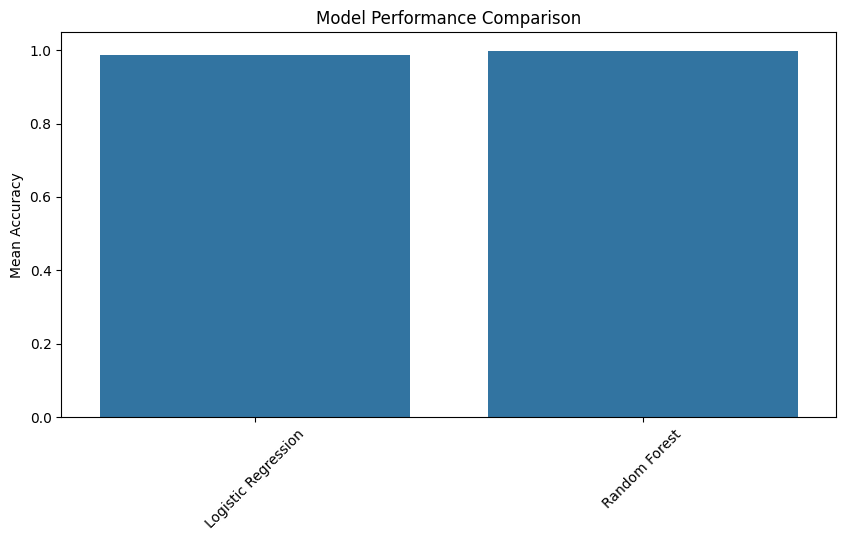

In [ ]:
# Plotting the model performance
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you want to compare Logistic Regression and Random Forest
model_results = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Random Forest': accuracy_score(y_test, rf_y_pred)
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()))
plt.title("Model Performance Comparison")
plt.ylabel("Mean Accuracy")
plt.xticks(rotation=45)
plt.show()

In [ ]:
best_model_name = max(model_results, key=model_results.get)

# Define the 'models' dictionary here, mapping model names to model instances
models = {
    'Logistic Regression': model,  # 'model' is your LogisticRegression instance
    'Random Forest': rf_model  # 'rf_model' is your RandomForestClassifier instance
}

best_model = models[best_model_name]

# Train best model
best_model.fit(X_train_vec, y_train)

# Evaluate on the test set
y_pred_best = best_model.predict(X_test_vec)
from sklearn.metrics import accuracy_score, classification_report

print(f"Best Model: {best_model_name}")
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model: Random Forest
Test Accuracy: 0.9984409799554566
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4719
           1       1.00      1.00      1.00      4261

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
# Separate word counts for both categories
# Recalculating word_count to ensure it's present in combined_df
combined_df['word_count'] = combined_df['text'].apply(lambda x: len(x.split()))

fake_word_counts = combined_df[combined_df['label'] == 0]['word_count']
real_word_counts = combined_df[combined_df['label'] == 1]['word_count']

# Check basic stats
print("Fake News Word Count Mean:", fake_word_counts.mean())
print("Real News Word Count Mean:", real_word_counts.mean())

Fake News Word Count Mean: 423.1979046888974
Real News Word Count Mean: 385.6400989867862


In [ ]:
from statsmodels.stats.weightstats import ztest

z_stat, p_val = ztest(fake_word_counts, real_word_counts)
print("Z-test Statistic:", z_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Result: Significant difference in word counts (Reject Null Hypothesis)")
else:
    print("❌ Result: No significant difference (Fail to Reject Null Hypothesis)")


Z-test Statistic: 11.331935098979523
P-value: 9.11679883298328e-30
✅ Result: Significant difference in word counts (Reject Null Hypothesis)


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val_t = ttest_ind(fake_word_counts, real_word_counts)
print("T-test Statistic:", t_stat)
print("P-value:", p_val_t)

if p_val_t < 0.05:
    print("✅ Result: Significant difference in word counts (Reject Null Hypothesis)")
else:
    print("❌ Result: No significant difference (Fail to Reject Null Hypothesis)")


T-test Statistic: 11.331935098979525
P-value: 1.0006043506438576e-29
✅ Result: Significant difference in word counts (Reject Null Hypothesis)
